In [226]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [227]:
df = pd.read_csv("./music_genre_cleaned.csv")
df.head()

popularity  acousticness  danceability duration  energy  instrumentalness  \
0          31       0.01270         0.622   medium    high          0.950000   
1          28       0.00306         0.620   medium    high          0.011800   
2          34       0.02540         0.774   medium  medium          0.002530   
3          32       0.00465         0.638   medium  medium          0.909000   
4          46       0.02890         0.572   medium    high          0.000008   

   liveness  speechiness  tempo  valence music_genre  
0     0.124       0.0300    115    0.531  Electronic  
1     0.534       0.0345    128    0.333  Electronic  
2     0.157       0.2390    128    0.270  Electronic  
3     0.157       0.0413    145    0.323  Electronic  
4     0.106       0.3510    150    0.230  Electronic

# Pasiruošimas

In [228]:
df["duration"] = df["duration"].map({"short": 0, "medium": 1,"high" : 2,"extraLong" : 3})
df["energy"] = df["energy"].map({"low": 0, "high": 2, "medium": 1})

In [229]:
X = df.drop("music_genre", axis=1)
y = df.music_genre

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Medis (1) - Medžio gylis 4


In [231]:
model = DecisionTreeClassifier(max_depth = 4);
model.fit(X,y);

In [232]:
y_predict = model.predict(X_test)

In [233]:
accuracy_score(y_test, y_predict)

0.42061143984220906

In [234]:
model.score(X_test, y_test)

0.42061143984220906

In [235]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
score.head()

Actual   Predicted
3318   Electronic  Electronic
32638   Classical   Classical
27227       Blues  Electronic
24615       Blues     Hip-Hop
29045        Rock     Country

In [236]:
plt.figure(figsize = (100, 100))
plt.title('Decision Tree Classification')
plot_tree(model, feature_names = X_train.columns,  filled = True, rounded = True);

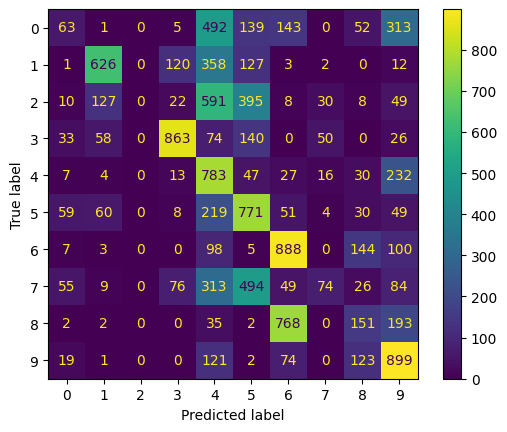

In [237]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot();

# Medis (2) - Medžio gylis 3


Acuracy score:  0.3756574621959237


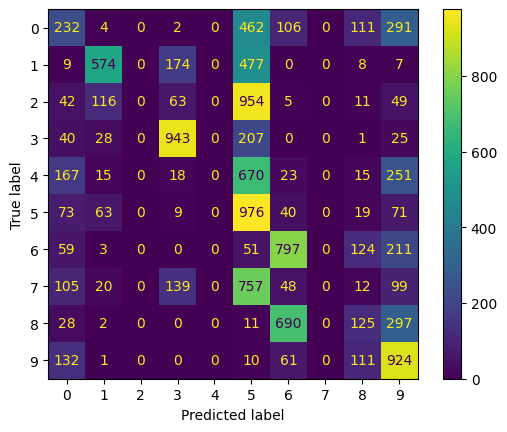

In [238]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X,y)
model.score(X_test, y_test)
y_predict = model.predict(X_test)
print("Acuracy score: ", accuracy_score(y_test, y_predict))
plt.figure(figsize = (100, 100))
plt.title('Decision Tree Classification')
plot_tree(model, feature_names = X_train.columns,  filled = True, rounded = True);
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot();

In [239]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
score.head()

Actual    Predicted
3318   Electronic   Electronic
32638   Classical    Classical
27227       Blues   Electronic
24615       Blues      Hip-Hop
29045        Rock  Alternative

# Medis (3) - Medžio gylis 2


Acuracy score:  0.32790927021696253


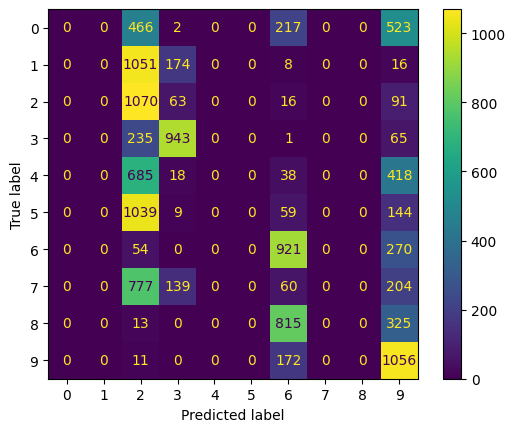

In [240]:
model = DecisionTreeClassifier(max_depth = 2)
model.fit(X,y)
model.score(X_test, y_test)
y_predict = model.predict(X_test)
print("Acuracy score: ", accuracy_score(y_test, y_predict))
plt.figure(figsize = (100, 100))
plt.title('Decision Tree Classification')
plot_tree(model, feature_names = X_train.columns,  filled = True, rounded = True);
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot();

In [241]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
score.head()

Actual  Predicted
3318   Electronic      Blues
32638   Classical  Classical
27227       Blues      Blues
24615       Blues    Hip-Hop
29045        Rock       Rock

# Medis (4) - Medžio gylis 1

Acuracy score:  0.20159434582511507


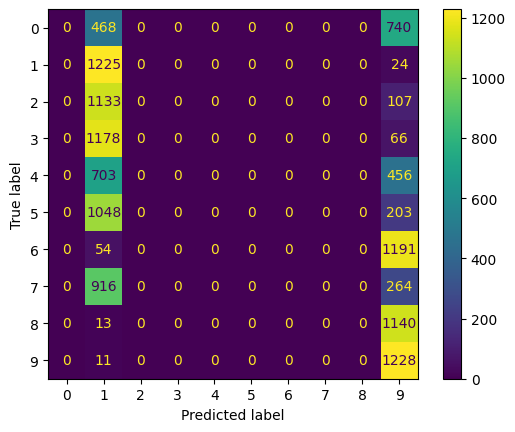

In [242]:
model = DecisionTreeClassifier(max_depth = 1)
model.fit(X,y)
model.score(X_test, y_test)
y_predict = model.predict(X_test)
print("Acuracy score: ", accuracy_score(y_test, y_predict))
plt.figure(figsize = (100, 100))
plt.title('Decision Tree Classification')
plot_tree(model, feature_names = X_train.columns,  filled = True, rounded = True);
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot();

In [243]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
score.head()

Actual Predicted
3318   Electronic     Anime
32638   Classical     Anime
27227       Blues     Anime
24615       Blues      Rock
29045        Rock      Rock

# Random Forest (1) - 5 medžiai
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Acuracy score:  0.4606344510190664


Actual  Predicted
3318   Electronic      Blues
32638   Classical  Classical
27227       Blues       Jazz
24615       Blues       Rock
29045        Rock    Hip-Hop

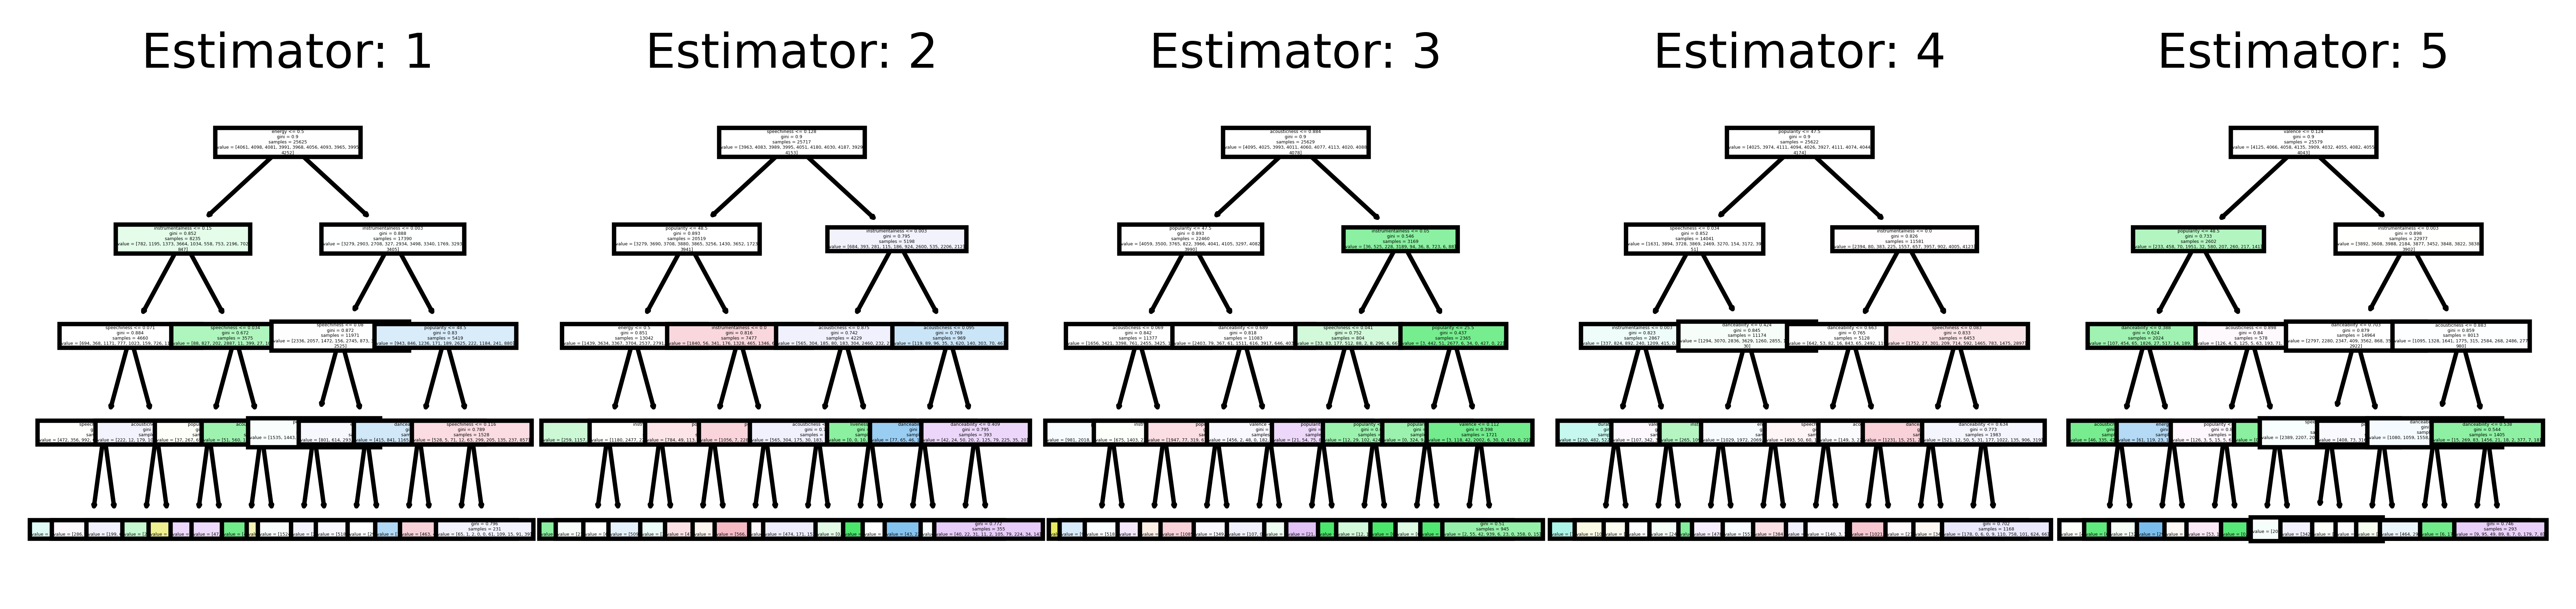

In [244]:
clf = RandomForestClassifier(n_estimators=5, max_depth=4, random_state=0);
clf.fit(X, y);
clf.score(X_test, y_test)
y_predict = clf.predict(X_test)
print("Acuracy score: ", accuracy_score(y_test, y_predict))
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = X_train.columns, 
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 11)
score.head()

# Random Forest (2) - 4 medžiai

Acuracy score:  0.4564431295200526


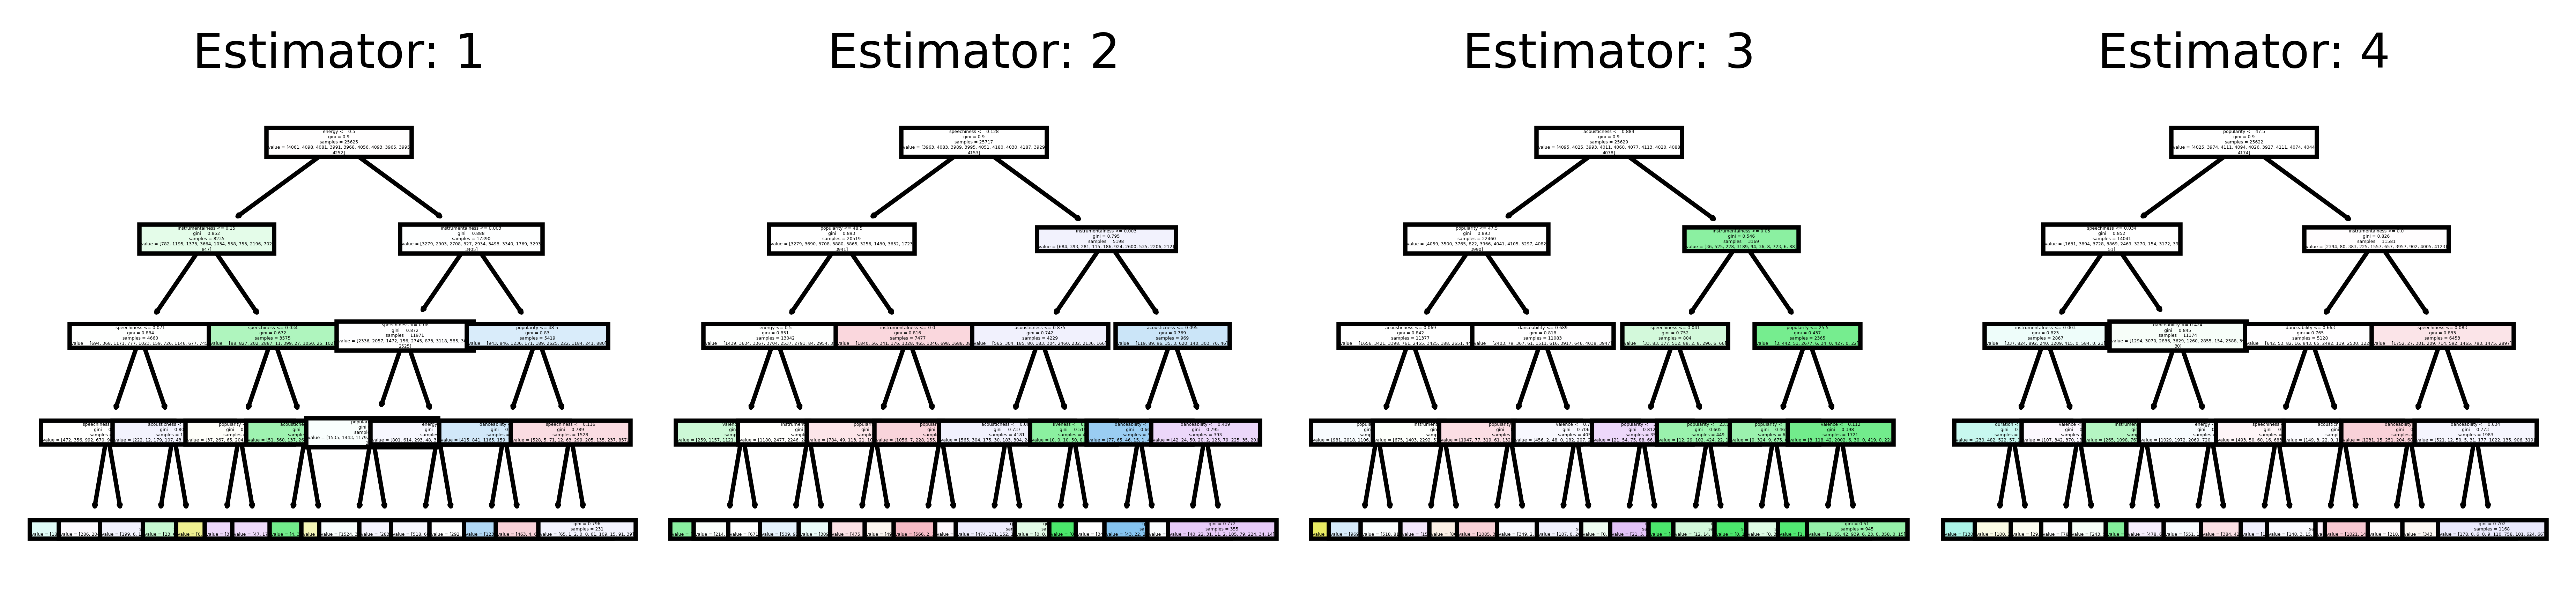

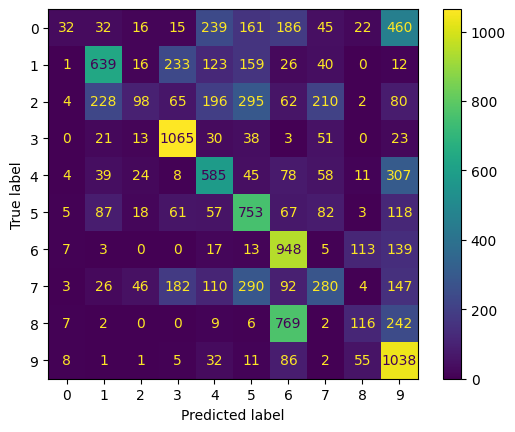

In [245]:
clf = RandomForestClassifier(n_estimators=4, max_depth=4, random_state=0);
clf.fit(X, y);
clf.score(X_test, y_test)
y_predict = clf.predict(X_test)
print("Acuracy score: ", accuracy_score(y_test, y_predict))
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (10,2), dpi=900)
for index in range(0, 4):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = X_train.columns, 
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 11)
score.head()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot();

# Random Forest (2) - 3 medžiai

Acuracy score:  0.4552103879026956


Actual   Predicted
3318   Electronic  Electronic
32638   Classical   Classical
27227       Blues        Jazz
24615       Blues        Rock
29045        Rock     Hip-Hop

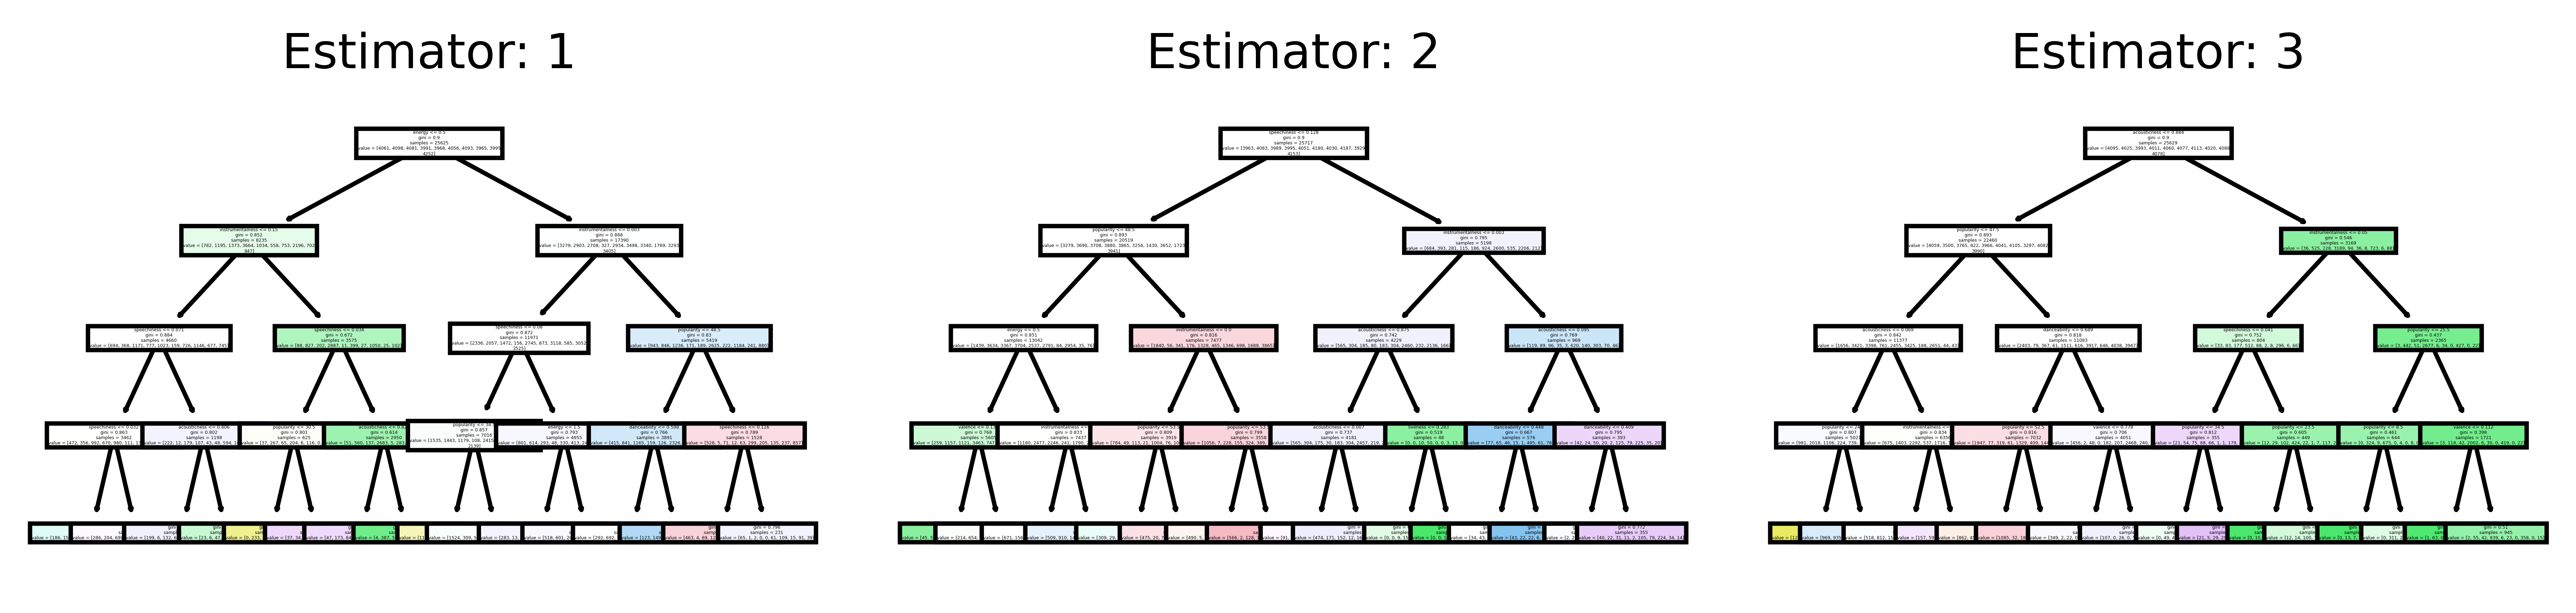

In [246]:
clf = RandomForestClassifier(n_estimators=3, max_depth=4, random_state=0);
clf.fit(X, y);
clf.score(X_test, y_test)
y_predict = clf.predict(X_test)
print("Acuracy score: ", accuracy_score(y_test, y_predict))
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = X_train.columns,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 11)
score.head()